In [1]:
# Drawing imports
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline


# Utility imports
import csv
import copy
import networkx as nx
from random import random


size = plt.rcParams["figure.figsize"]

In [2]:
class Network(nx.DiGraph):
    """Network class."""
    def __init__(self):
        nx.DiGraph.__init__(self)
        self.population = {}

    def add_node(self, person):
        nx.DiGraph.add_node(self, person)
        self.population[person.id] = person


class Person:
    """Person class."""
    empty = set()

    def __init__(self, id, conn1, conn2, conn3, start, duration, end):
        self.id = id
        self.pos = (random()*size[0], random()*size[1])
        self.potential_connections = set((conn1, conn2, conn3))
        self.start = start
        self.duration = duration
        self.end = end

    def connections(self, step):
        if self.start <= step < self.duration:
            return self.potential_connections
        return Person.empty

In [3]:
def init_network():
    network = Network()
    with open('network.csv') as file:
        reader = csv.reader(file, delimiter=',')
        labels = next(reader)
        for row in reader:
            row = [int(param) for param in row]
            person = Person(*row)
            network.add_node(person)
    return network


blank_network = init_network()

In [4]:
def get_frame(step):
    network = copy.deepcopy(blank_network)
    for person in network.nodes():
        for other in person.connections(step):
            network.add_edge(person, network.population[other])
    pos = {person: person.pos for person in network.nodes()}
    node_connections = [len(person.connections(step)) for person in network.nodes()]
    nx.draw(network, pos, node_size=5, cmap=plt.get_cmap('jet'),
            node_color=node_connections, width=0.1)

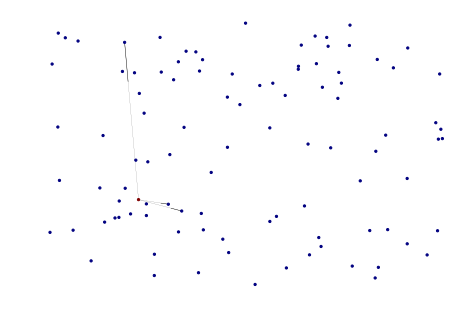

In [5]:
_ = widgets.interact(get_frame, step=widgets.IntSlider(min=0, max=300, value=0))